# Word to Vectors

Problems with BOW and TF-IDF
- Semantic information is not stored
- TF-IDF gives importance to uncommon words
- Chances of overfitting

To overcome this, we go for words to vectors

Word2Vectors
- Model where each word is represented as a vector of 32 or more dimension instead of single number
- Semantic information and relation between different words is also preserved

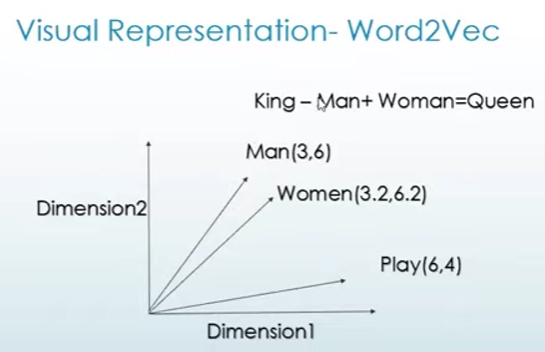


Steps to create words to vectors
- Tokenization of the sentences
- Create histograms
- Take most frequent words
- Create a matrix with all unique words. 
- Represent the occurence relation between the words.

In [3]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

In [5]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [7]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [8]:
text

'i have three visions for india. in years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds. from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours. yet we have not done this to any other nation. we have not conquered anyone. we have not grabbed their land, their culture, their history and tried to enforce our way of life on them. why? because we respect the freedom of others.that is why my first vision is that of freedom. i believe that india got its first vision of this in , when we started the war of independence. it is this freedom that we must protect and nurture and build on. if we are not free, no one will respect us. my second vision for india’s development. for fifty years we have been a developing nation. it is time we see ourselves as a developed nation. we are among the top nations of the world in term

In [9]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['i have three visions for india.',
 'in years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.',
 'from alexander onwards, the greeks, the turks, the moguls, the portuguese, the british, the french, the dutch, all of them came and looted us, took over what was ours.',
 'yet we have not done this to any other nation.',
 'we have not conquered anyone.',
 'we have not grabbed their land, their culture, their history and tried to enforce our way of life on them.',
 'why?',
 'because we respect the freedom of others.that is why my first vision is that of freedom.',
 'i believe that india got its first vision of this in , when we started the war of independence.',
 'it is this freedom that we must protect and nurture and build on.',
 'if we are not free, no one will respect us.',
 'my second vision for india’s development.',
 'for fifty years we have been a developing nation.',
 'it is time we see ourselves as a developed nati

In [10]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
sentences

[['i', 'have', 'three', 'visions', 'for', 'india', '.'],
 ['in',
  'years',
  'of',
  'our',
  'history',
  ',',
  'people',
  'from',
  'all',
  'over',
  'the',
  'world',
  'have',
  'come',
  'and',
  'invaded',
  'us',
  ',',
  'captured',
  'our',
  'lands',
  ',',
  'conquered',
  'our',
  'minds',
  '.'],
 ['from',
  'alexander',
  'onwards',
  ',',
  'the',
  'greeks',
  ',',
  'the',
  'turks',
  ',',
  'the',
  'moguls',
  ',',
  'the',
  'portuguese',
  ',',
  'the',
  'british',
  ',',
  'the',
  'french',
  ',',
  'the',
  'dutch',
  ',',
  'all',
  'of',
  'them',
  'came',
  'and',
  'looted',
  'us',
  ',',
  'took',
  'over',
  'what',
  'was',
  'ours',
  '.'],
 ['yet',
  'we',
  'have',
  'not',
  'done',
  'this',
  'to',
  'any',
  'other',
  'nation',
  '.'],
 ['we', 'have', 'not', 'conquered', 'anyone', '.'],
 ['we',
  'have',
  'not',
  'grabbed',
  'their',
  'land',
  ',',
  'their',
  'culture',
  ',',
  'their',
  'history',
  'and',
  'tried',
  'to',
  'e

In [11]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
sentences

[['three', 'visions', 'india', '.'],
 ['years',
  'history',
  ',',
  'people',
  'world',
  'come',
  'invaded',
  'us',
  ',',
  'captured',
  'lands',
  ',',
  'conquered',
  'minds',
  '.'],
 ['alexander',
  'onwards',
  ',',
  'greeks',
  ',',
  'turks',
  ',',
  'moguls',
  ',',
  'portuguese',
  ',',
  'british',
  ',',
  'french',
  ',',
  'dutch',
  ',',
  'came',
  'looted',
  'us',
  ',',
  'took',
  '.'],
 ['yet', 'done', 'nation', '.'],
 ['conquered', 'anyone', '.'],
 ['grabbed',
  'land',
  ',',
  'culture',
  ',',
  'history',
  'tried',
  'enforce',
  'way',
  'life',
  '.'],
 ['?'],
 ['respect', 'freedom', 'others.that', 'first', 'vision', 'freedom', '.'],
 ['believe',
  'india',
  'got',
  'first',
  'vision',
  ',',
  'started',
  'war',
  'independence',
  '.'],
 ['freedom', 'must', 'protect', 'nurture', 'build', '.'],
 ['free', ',', 'one', 'respect', 'us', '.'],
 ['second', 'vision', 'india', '’', 'development', '.'],
 ['fifty', 'years', 'developing', 'nation', '.'

In [12]:
   # Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

In [14]:
words = model.wv.key_to_index 

In [15]:
words

{'.': 0,
 ',': 1,
 'india': 2,
 'vision': 3,
 'must': 4,
 'nation': 5,
 'world': 6,
 'us': 7,
 'three': 8,
 'freedom': 9,
 'respect': 10,
 'see': 11,
 'first': 12,
 'power': 13,
 'yet': 14,
 '’': 15,
 'strength': 16,
 'worked': 17,
 '?': 18,
 'life': 19,
 'believe': 20,
 'dr.': 21,
 'great': 22,
 'minds': 23,
 'one': 24,
 'years': 25,
 'history': 26,
 'developed': 27,
 'conquered': 28,
 'protect': 29,
 'others.that': 30,
 'war': 31,
 'nurture': 32,
 'independence': 33,
 'build': 34,
 'free': 35,
 'tried': 36,
 'got': 37,
 'started': 38,
 'way': 39,
 'enforce': 40,
 'took': 41,
 'culture': 42,
 'turks': 43,
 'visions': 44,
 'people': 45,
 'come': 46,
 'invaded': 47,
 'captured': 48,
 'lands': 49,
 'alexander': 50,
 'onwards': 51,
 'greeks': 52,
 'moguls': 53,
 'land': 54,
 'portuguese': 55,
 'british': 56,
 'french': 57,
 'dutch': 58,
 'came': 59,
 'looted': 60,
 'done': 61,
 'anyone': 62,
 'grabbed': 63,
 'second': 64,
 'career': 65,
 'development': 66,
 'respects': 67,
 'military': 68

In [17]:
# Finding Word Vectors
vector = model.wv['war']
vector

array([-0.00219905, -0.00970885,  0.00929075,  0.00203636, -0.00116388,
       -0.00551955, -0.0085126 , -0.00989383,  0.00894091, -0.00250522,
        0.00459427, -0.00452481,  0.00995189,  0.00366171,  0.00103129,
       -0.00403834,  0.00122027, -0.00265451,  0.00735284,  0.00447542,
        0.00099955,  0.0034782 ,  0.00372712, -0.00680036,  0.00893243,
        0.00173499, -0.00579935,  0.00866838, -0.00129286,  0.00818304,
       -0.0014927 ,  0.00698649,  0.00273452, -0.00436226, -0.00374683,
        0.00919046,  0.00159645, -0.00599784,  0.00034776, -0.00195135,
        0.00159242, -0.00771525,  0.00738298,  0.00131083,  0.00787099,
        0.00445568, -0.00439675,  0.00376054, -0.0006357 , -0.00984484,
        0.00825004,  0.00964326,  0.00965426, -0.00379659, -0.00844202,
        0.00483581, -0.00765107,  0.00853567,  0.00275977,  0.00560496,
        0.00611362,  0.00046455, -0.00209463,  0.000778  ,  0.00983559,
       -0.00711718, -0.00155743, -0.00235984,  0.00487084,  0.00

In [18]:
# Most similar words
similar = model.wv.most_similar('vikram')

In [19]:
similar

[('visions', 0.1814650446176529),
 ('growth', 0.1663494110107422),
 ('one', 0.1643451601266861),
 ('took', 0.1643296480178833),
 (',', 0.15887506306171417),
 ('fifty', 0.1472669243812561),
 ('developing', 0.14714020490646362),
 ('worked', 0.13810549676418304),
 ('development', 0.13769842684268951),
 ('time', 0.13293513655662537)]

In [24]:
# Most similar words
similar = model.wv.most_similar('war')
similar

[('rate', 0.1720738261938095),
 ('’', 0.15882465243339539),
 ('professor', 0.15752416849136353),
 ('material', 0.1459617018699646),
 ('great', 0.14304539561271667),
 ('unless', 0.14020974934101105),
 ('us', 0.12788502871990204),
 ('looted', 0.12448827922344208),
 ('self-reliant', 0.1218823567032814),
 ('worked', 0.11109071969985962)]

In [25]:
# Most similar words
similar = model.wv.most_similar('freedom')
similar

[('unless', 0.2513527274131775),
 ('moguls', 0.2480589896440506),
 ('.', 0.2167753130197525),
 ('visions', 0.21363484859466553),
 ('development', 0.20419523119926453),
 ('turks', 0.16215139627456665),
 ('self-confidence', 0.1557946503162384),
 ('father', 0.15303698182106018),
 ('areas', 0.14788690209388733),
 ('falling', 0.1441386640071869)]